In [1]:
%load_ext watermark
%watermark  -d -u -a 'Andreas Mueller, Kyle Kastner, Sebastian Raschka' -v -p numpy,scipy,matplotlib,sklearn

Andreas Mueller, Kyle Kastner, Sebastian Raschka 
last updated: 2017-04-12 

CPython 3.6.1
IPython 5.3.0

numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.0
sklearn 0.18.1


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# SciPy 2016 Scikit-learn Tutorial

# Linear models
Linear models are useful when little data is available or for very large feature spaces as in text classification. In addition, they form a good case study for regularization.

# Linear models for regression

All linear models for regression learn a coefficient parameter ``coef_`` and an offset ``intercept_`` to make predictions using a linear combination of features:

```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_
```

The difference between the linear models for regression is what kind of restrictions or penalties are put on ``coef_`` as regularization , in addition to fitting the training data well.
The most standard linear model is the 'ordinary least squares regression', often simply called 'linear regression'. It doesn't put any additional restrictions on ``coef_``, so when the number of features is large, it becomes ill-posed and the model overfits.

Let us generate a simple simulation, to see the behavior of these models.

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)
print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


## Linear Regression

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [4]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.878011
R^2 on test set: 0.216332


/Users/octavipersonal/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [5]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.598528449588


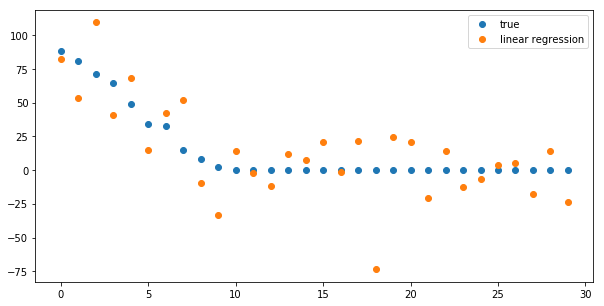

In [6]:
plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend()

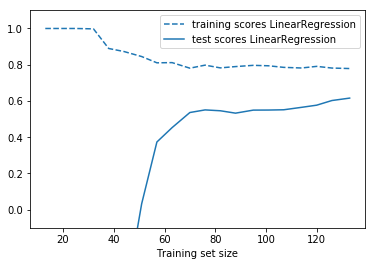

In [7]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()    
plot_learning_curve(LinearRegression(), X, y)

## Ridge Regression (L2 penalty)

**The Ridge estimator** is a simple regularization (called l2 penalty) of the ordinary LinearRegression. In particular, it has the benefit of being not computationally more expensive than the ordinary least square estimate.

$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$ 

The amount of regularization is set via the `alpha` parameter of the Ridge.

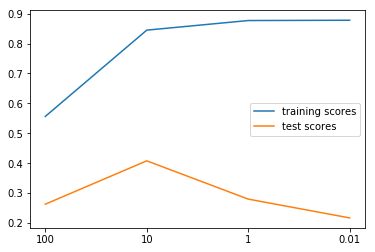

In [8]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

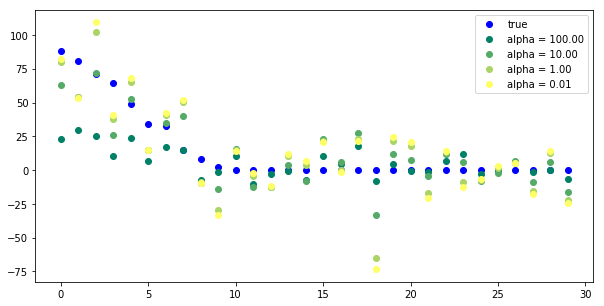

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

Tuning alpha is critical for performance.

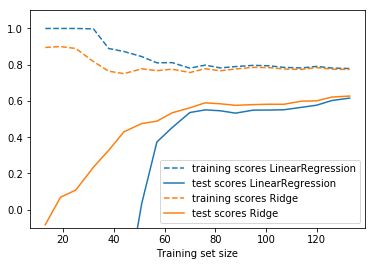

In [10]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

## Lasso (L1 penalty)
**The Lasso estimator** is useful to impose sparsity on the coefficient. In other words, it is to be prefered if we believe that many of the features are not relevant. This is done via the so-called l1 penalty.

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$ 

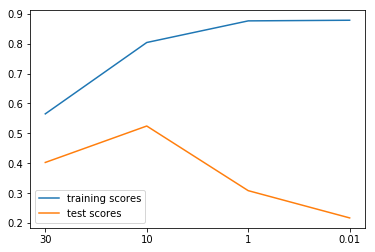

In [11]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

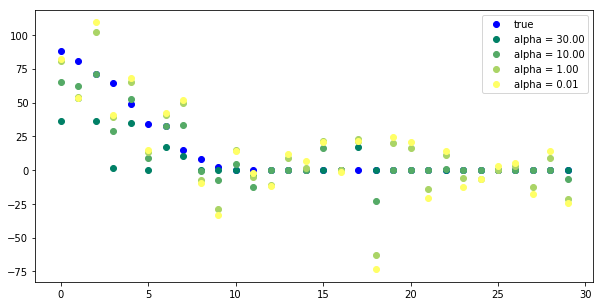

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

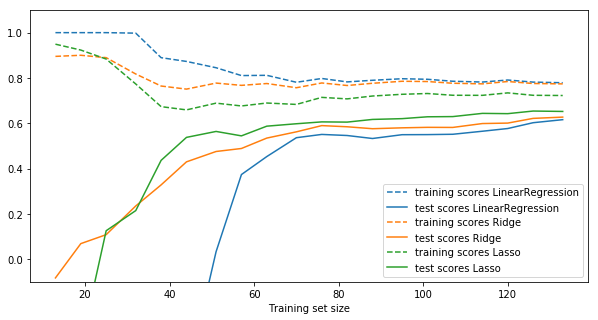

In [13]:
plt.figure(figsize=(10, 5))
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)

Instead of picking Ridge *or* Lasso, you can also use [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), which uses both forms of regularization and provides a parameter to assign a weighting between them. ElasticNet typically performs the best amongst these models.

## Linear models for classification

All linear models for classification learn a coefficient parameter ``coef_`` and an offset ``intercept_`` to make predictions using a linear combination of features:
```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_ > 0
```

As you can see, this is very similar to regression, only that a threshold at zero is applied.

Again, the difference between the linear models for classification what kind of regularization is put on ``coef_`` and ``intercept_``, but there are also minor differences in how the fit to the training set is measured (the so-called loss function).

The two most common models for linear classification are the linear SVM as implemented in LinearSVC and LogisticRegression.

A good intuition for regularization of linear classifiers is that with high regularization, it is enough if most of the points are classified correctly. But with less regularization, more importance is given to each individual data point.
This is illustrated using an linear SVM with different values of ``C`` below.


### The influence of C in LinearSVC

In LinearSVC, the `C` parameter controls the regularization within the model.

Lower `C` entails more regularization and simpler models, whereas higher `C` entails less regularization and more influence from individual data points.

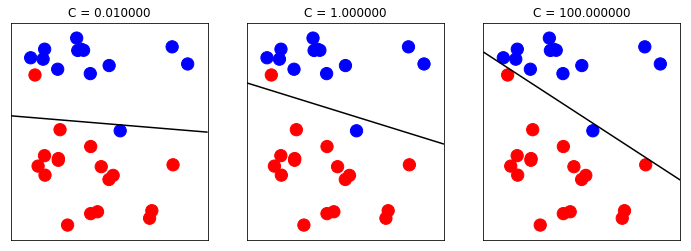

In [14]:
from figures import plot_linear_svc_regularization
plot_linear_svc_regularization()

Similar to the Ridge/Lasso separation, you can set the `penalty` parameter to 'l1' to enforce sparsity of the coefficients (similar to Lasso) or 'l2' to encourage smaller coefficients (similar to Ridge).

## Multi-class linear classification

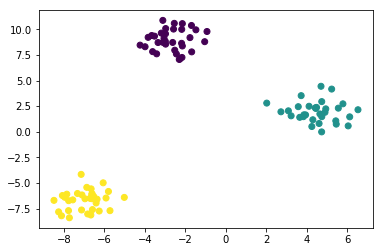

In [15]:
from sklearn.datasets import make_blobs
plt.figure()
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [16]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


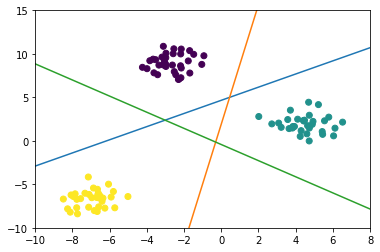

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8);

Points are classified in a one-vs-rest fashion (aka one-vs-all), where we assign a test point to the class whose model has the highest confidence (in the SVM case, highest distance to the separating hyperplane) for the test point.

# Exercises

Use LogisticRegression to classify the digits data set, and grid-search the C parameter.

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# split the dataset, apply grid-search
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

classifier = LogisticRegression()

grid = GridSearchCV(classifier, param_grid={'C': [100, 10, 1, .01, 0.001, 0.0001]}, cv=5)
grid.fit(X_train, y_train)

print('best parameters:', grid.best_params_)
print('best score:', grid.best_score_)
print('test score:', grid.score(X_test, y_test))

best parameters: {'C': 0.01}
best score: 0.961395694135
test score: 0.973333333333


In [19]:
# %load solutions/17A_logreg_grid.py
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X_digits, y_digits = digits.data, digits.target
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=3)
grid.fit(X_digits_train, y_digits_train)
print('Best score for LogisticRegression: {}'.format(grid.score(X_digits_test, y_digits_test)))
print('Best parameters for LogisticRegression: {}'.format(grid.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.930657, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.948339, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.966543, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.936330, total=   0.1s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......................... C=0.001, score=0.951128, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.956204, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.963100, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.977695, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.951311, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.951128, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................ C=0.1, score=0.941606, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.0s finished


How do you think the learning curves above change when you increase or decrease alpha?
Try changing the alpha parameter in ridge and lasso, and see if your intuition was correct.

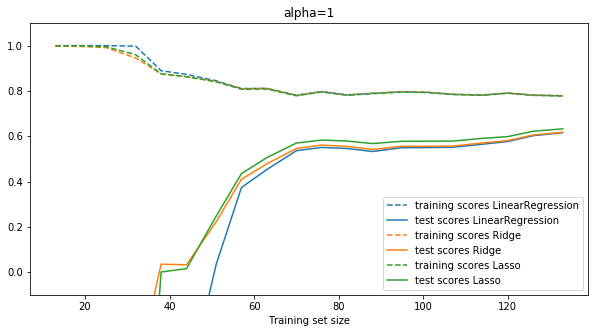

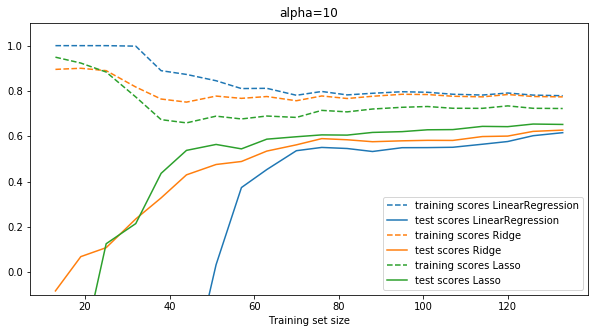

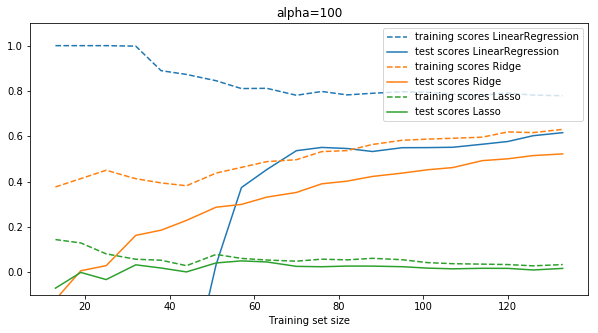

In [20]:
# %load solutions/17B_learning_curve_alpha.py
X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)

plt.figure(figsize=(10, 5))
plt.title('alpha=1')
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(Lasso(alpha=1), X, y)

plt.figure(figsize=(10, 5))
plt.title('alpha=10')
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)

plt.figure(figsize=(10, 5))
plt.title('alpha=100')
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=100), X, y)
plot_learning_curve(Lasso(alpha=100), X, y)
